In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import datetime as dt
import os
import numpy as np
import networkx as nx
import itertools
import copy


from timeit import default_timer as timer
from sklearn.preprocessing import MinMaxScaler
from numpy import array 

In [2]:
# Set the plotting style
# print(plt.style.available)
plt.style.use('seaborn-whitegrid')

In [3]:
# Import the training set
filename = '/Users/Geoff/Desktop/MMAI/CAPSTONE/aragon-all-votes.csv'
df = pd.read_csv(filename)

In [4]:
len(df)

639

In [5]:
# Inspect Data
df.head()

,voting_number,timestamp,voter,vote,staked_ANT_amount,tx
0,0,2019-01-24T00:05:56.000Z,0x17d38262ceb5317af645a246b0ce6fc4cc3088f6,Yes,249.980000,0x7bffb2e0cf5e1a73bea38565d25821418344269bd144...
1,0,2019-01-24T01:22:45.000Z,0x2b5afa7a939e475a327c763f725d88e8a92ce342,Yes,1510.761544,0x51947df002e5ac8bb2928e083dfd5d57b9e2ac0bee26...
2,0,2019-01-24T02:44:02.000Z,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,Yes,2987.342012,0x3b62bc58824723f7507f4dfd33b7a9e3ff941a6f7cad...
3,0,2019-01-24T03:09:50.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,Yes,5602.726497,0xac26a765b069f9db78c532e07889599e2c855ec9c36b...
4,0,2019-01-24T03:10:30.000Z,0xd472fa32294977196b9ad47e7865e0d737220e32,Yes,5602.726497,0x7a620bf8e4f80c0646e2cec6bd9cba108a29e8c17c68...


In [6]:
df.describe()

,voting_number,staked_ANT_amount
count,639.000000,6.390000e+02
mean,8.269171,4.470236e+04
std,4.547503,1.721722e+05
min,0.000000,5.363874e-02
25%,5.000000,2.100021e+02
50%,9.000000,2.000000e+03
75%,12.500000,2.000000e+04
max,15.000000,1.913140e+06


In [7]:
df.dtypes

voting_number          int64
timestamp             object
voter                 object
vote                  object
staked_ANT_amount    float64
tx                    object
dtype: object

In [15]:
df.nunique()

voting_number         16
timestamp            579
voter                113
vote                   2
staked_ANT_amount    116
tx                   639
dtype: int64

In [11]:
g = nx.from_pandas_edgelist(df, source='voter', target='voting_number') 

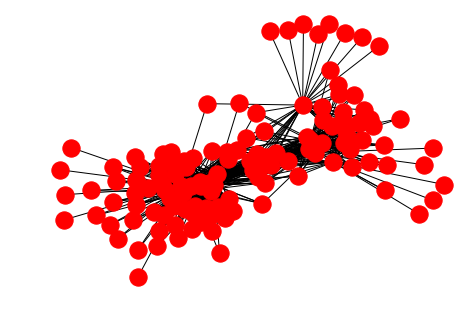

In [12]:
nx.draw(g)

In [16]:
voter = list(df.voter.unique())

In [17]:
voter

['0x17d38262ceb5317af645a246b0ce6fc4cc3088f6',
 '0x2b5afa7a939e475a327c763f725d88e8a92ce342',
 '0x839395e20bbb182fa440d08f850e6c7a8f6f0780',
 '0xd472fa32294977196b9ad47e7865e0d737220e32',
 '0x915bef8030c3f6e992522ab9fb714ffe6c30156c',
 '0xbfc7cae0fad9b346270ae8fde24827d2d779ef07',
 '0x86e1c887490b57fd84231d048466efea9f1c762a',
 '0x450c0c90706a8cc664e8b496711370b43415715d',
 '0x47e317b00862fa05ffc5d0c063dfcd45e9c5e456',
 '0x0ed8f275eab9edf99120c4b101c232ff46ef7145',
 '0x4941105e6d11cff9be097a837cb68091f59a029c',
 '0xf69cd35a7299ba94e6bee03265837d0acb89d44a',
 '0x57364d13258bdac76167605d9fb47e958d0d1ab1',
 '0xf0bea4a25b280955417b1ca0c2519a5f6e752fae',
 '0xaf54743051f61fda465609460f081c9aa426569e',
 '0xd395d4a9753310f3940de2673c70c251224e3d07',
 '0xb8506be2c700641873108a1a47d8e509157cf231',
 '0xf1f0c294d247e8691d1118a86ccc669da3c75ca8',
 '0xcafb4ff79d39949d29e2ec4eb6b42c1e7b4d8b2b',
 '0x583da21ad0c1171ae4b6cf24d92c46f033a0a794',
 '0xedfada8246c5d3e93e8012ffc8a549c32ef75b9c',
 '0x17de335cd

In [18]:
proposals = list(df.voting_number.unique())

In [19]:
proposals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [20]:
# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

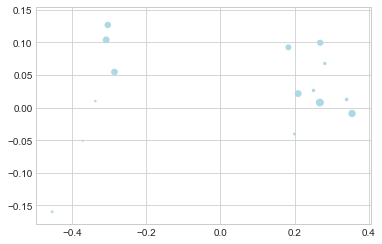

In [23]:
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
vote_size = [g.degree(proposals) for voting_number in proposals]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=proposals, 
                       node_size=vote_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

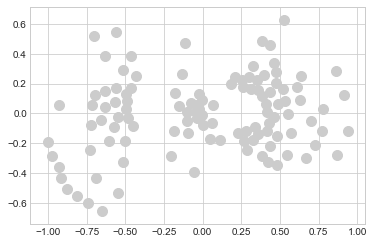

In [24]:
nx.draw_networkx_nodes(g, layout, nodelist=voter, node_color='#cccccc', node_size=100)

{0: Text(-0.37243,0.0713906,'0'),
 1: Text(-0.285679,0.0545319,'1'),
 2: Text(-0.371487,-0.0509303,'2'),
 3: Text(-0.307934,0.103884,'3'),
 4: Text(-0.33712,0.00982378,'4'),
 5: Text(-0.303752,0.126636,'5'),
 6: Text(-0.453688,-0.159712,'6'),
 7: Text(0.26918,0.0993856,'7'),
 8: Text(0.200026,-0.0404216,'8'),
 9: Text(0.20963,0.0214302,'9'),
 10: Text(0.281501,0.0676463,'10'),
 11: Text(0.183466,0.0923919,'11'),
 12: Text(0.250841,0.02624,'12'),
 13: Text(0.354871,-0.00903694,'13'),
 14: Text(0.34026,0.0124678,'14'),
 15: Text(0.268168,0.00772733,'15')}

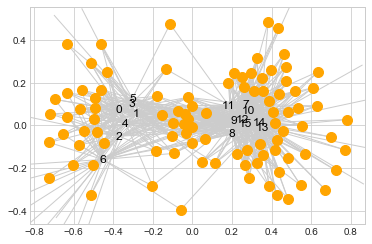

In [33]:
popular_proposals = [voter for voter in voter if g.degree(voter) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(proposals, proposals))
nx.draw_networkx_labels(g, layout, labels=node_labels)